In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import seaborn as sns; sns.set()
sns.set(style="ticks")
from pprint import pprint
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn.metrics import precision_recall_curve,average_precision_score
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,accuracy_score

In [2]:
data=pd.read_csv("C:/Users/Sneha/Desktop/Datasets/sales_data.csv")

In [3]:
data.head()

,flag,gender,education,house_val,age,online,customer_psy,marriage,child,occupation,mortgage,house_owner,region,car_prob,fam_income
0,Y,M,4. Grad,756460,1_Unk,N,B,NaN,U,Professional,1Low,NaN,Midwest,1,L
1,N,F,3. Bach,213171,7_>65,N,E,NaN,U,Professional,1Low,Owner,Northeast,3,G
2,N,M,2. Some College,111147,2_<=25,Y,C,NaN,Y,Professional,1Low,Owner,Midwest,1,J
3,Y,M,2. Some College,354151,2_<=25,Y,B,Single,U,Sales/Service,1Low,NaN,West,2,L
4,Y,F,2. Some College,117087,1_Unk,Y,J,Married,Y,Sales/Service,1Low,NaN,South,7,H


In [4]:
data.shape

(40000, 15)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 15 columns):
flag            40000 non-null object
gender          40000 non-null object
education       39259 non-null object
house_val       40000 non-null int64
age             40000 non-null object
online          40000 non-null object
customer_psy    40000 non-null object
marriage        25973 non-null object
child           40000 non-null object
occupation      40000 non-null object
mortgage        40000 non-null object
house_owner     36623 non-null object
region          40000 non-null object
car_prob        40000 non-null int64
fam_income      40000 non-null object
dtypes: int64(2), object(13)
memory usage: 4.6+ MB


In [6]:
data.isnull().sum()

flag                0
gender              0
education         741
house_val           0
age                 0
online              0
customer_psy        0
marriage        14027
child               0
occupation          0
mortgage            0
house_owner      3377
region              0
car_prob            0
fam_income          0
dtype: int64

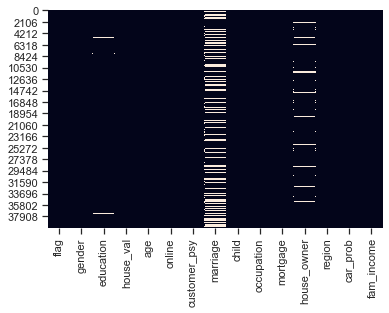

In [7]:
sns.heatmap(data.isnull(), cbar=False)

In [8]:
data.isnull().sum()/len(data)*100

flag             0.0000
gender           0.0000
education        1.8525
house_val        0.0000
age              0.0000
online           0.0000
customer_psy     0.0000
marriage        35.0675
child            0.0000
occupation       0.0000
mortgage         0.0000
house_owner      8.4425
region           0.0000
car_prob         0.0000
fam_income       0.0000
dtype: float64

In [9]:
for cat in data.columns:
    print(cat, data[cat].unique())

flag ['Y' 'N']
gender ['M' 'F' 'U']
education ['4. Grad' '3. Bach' '2. Some College' '1. HS' '0. <HS' nan]
house_val [756460 213171 111147 ... 120630 603554 213596]
age ['1_Unk' '7_>65' '2_<=25' '6_<=65' '5_<=55' '4_<=45' '3_<=35']
online ['N' 'Y']
customer_psy ['B' 'E' 'C' 'J' 'A' 'G' 'F' 'I' 'D' 'H' 'U']
marriage [nan 'Single' 'Married']
child ['U' 'Y' 'N' '0']
occupation ['Professional' 'Sales/Service' 'Blue Collar' 'Others' 'Retired' 'Farm']
mortgage ['1Low' '2Med' '3High']
house_owner [nan 'Owner' 'Renter']
region ['Midwest' 'Northeast' 'West' 'South' 'Rest']
car_prob [1 3 2 7 5 6 9 8 4 0]
fam_income ['L' 'G' 'J' 'H' 'C' 'I' 'D' 'E' 'A' 'F' 'B' 'K' 'U']


In [10]:
#On education
data.replace('0. <HS', 'dropout', inplace=True)
data.replace('1. HS', 'hs', inplace=True)
data.replace('2. Some College', 'associates', inplace=True)
data.replace('3. Bach', 'bachelors', inplace=True)
data.replace('4. Grad', 'masters', inplace=True)
#On age
data.replace('1_Unk', 'Unknown', inplace=True)
data.replace('2_<=25', '0-25', inplace=True)
data.replace('3_<=35', '25-35', inplace=True)
data.replace('4_<=45', '35-45', inplace=True)
data.replace('5_<=55', '45-55', inplace=True)
data.replace('6_<=65', '55-65', inplace=True)
data.replace('7_>65', '>65', inplace=True)
#On mortgage
data.replace('1Low', 'low', inplace=True)
data.replace('2Med', 'medium', inplace=True)
data.replace('3High', 'high', inplace=True)
#On child
data.replace('U', 'None', inplace=True)
data.replace('0', 'None', inplace=True)
#On gender
data.replace('U', 'Unknown', inplace=True)
#Car_prob
data['car_prob']=data['car_prob'].replace(to_replace=1,value=1.0)
data['car_prob']=data['car_prob'].replace(to_replace=2,value=.9)
data['car_prob']=data['car_prob'].replace(to_replace=3,value=.8)
data['car_prob']=data['car_prob'].replace(to_replace=4,value=.7)
data['car_prob']=data['car_prob'].replace(to_replace=5,value=.6)
data['car_prob']=data['car_prob'].replace(to_replace=6,value=.5)
data['car_prob']=data['car_prob'].replace(to_replace=7,value=.4)
data['car_prob']=data['car_prob'].replace(to_replace=8,value=.3)
data['car_prob']=data['car_prob'].replace(to_replace=9,value=.2)
data['car_prob']=data['car_prob'].replace(to_replace=0,value=.1)

In [11]:
#Filling missing values
data['education'].fillna('None', inplace=True)
data['marriage'].fillna('Unmarried', inplace=True)
data['house_owner'].fillna('Homeless', inplace=True)

In [12]:
data.isnull().sum()/len(data)*100

flag            0.0
gender          0.0
education       0.0
house_val       0.0
age             0.0
online          0.0
customer_psy    0.0
marriage        0.0
child           0.0
occupation      0.0
mortgage        0.0
house_owner     0.0
region          0.0
car_prob        0.0
fam_income      0.0
dtype: float64

In [13]:
for cat in data.columns:
    print(cat, data[cat].unique())

flag ['Y' 'N']
gender ['M' 'F' 'None']
education ['masters' 'bachelors' 'associates' 'hs' 'dropout' 'None']
house_val [756460 213171 111147 ... 120630 603554 213596]
age ['Unknown' '>65' '0-25' '55-65' '45-55' '35-45' '25-35']
online ['N' 'Y']
customer_psy ['B' 'E' 'C' 'J' 'A' 'G' 'F' 'I' 'D' 'H' 'None']
marriage ['Unmarried' 'Single' 'Married']
child ['None' 'Y' 'N']
occupation ['Professional' 'Sales/Service' 'Blue Collar' 'Others' 'Retired' 'Farm']
mortgage ['low' 'medium' 'high']
house_owner ['Homeless' 'Owner' 'Renter']
region ['Midwest' 'Northeast' 'West' 'South' 'Rest']
car_prob [1.  0.8 0.9 0.4 0.6 0.5 0.2 0.3 0.7 0.1]
fam_income ['L' 'G' 'J' 'H' 'C' 'I' 'D' 'E' 'A' 'F' 'B' 'K' 'None']


In [14]:
data.head()

,flag,gender,education,house_val,age,online,customer_psy,marriage,child,occupation,mortgage,house_owner,region,car_prob,fam_income
0,Y,M,masters,756460,Unknown,N,B,Unmarried,None,Professional,low,Homeless,Midwest,1.0,L
1,N,F,bachelors,213171,>65,N,E,Unmarried,None,Professional,low,Owner,Northeast,0.8,G
2,N,M,associates,111147,0-25,Y,C,Unmarried,Y,Professional,low,Owner,Midwest,1.0,J
3,Y,M,associates,354151,0-25,Y,B,Single,None,Sales/Service,low,Homeless,West,0.9,L
4,Y,F,associates,117087,Unknown,Y,J,Married,Y,Sales/Service,low,Homeless,South,0.4,H


N    20000
Y    20000
Name: flag, dtype: int64


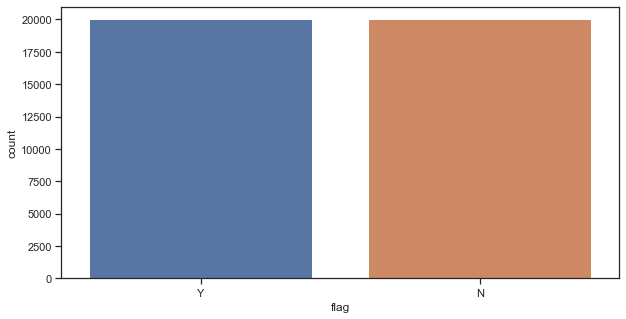

In [15]:
print(data['flag'].value_counts())
plt.figure(figsize=(10,5))
sns.countplot(x='flag',data=data)

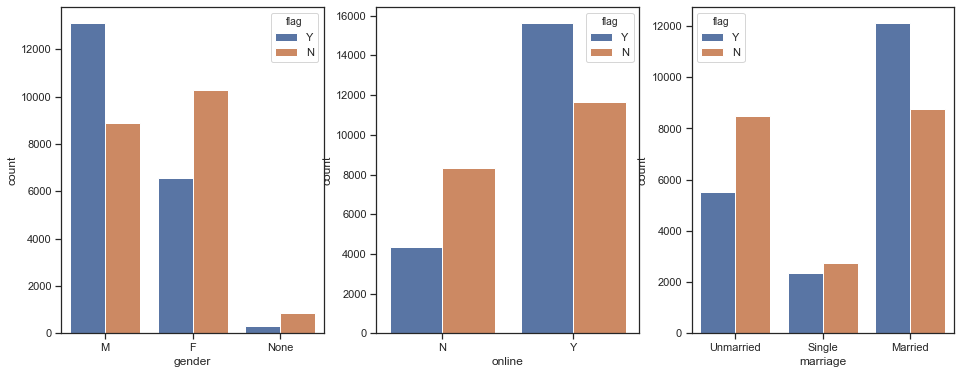

In [16]:
# Age Variable 
f,ax=plt.subplots(1,3,figsize=(16,6))
sns.countplot(x='gender',hue='flag',data=data,ax=ax[0])
sns.countplot(x='online',hue='flag',data=data,ax=ax[1])
sns.countplot(x='marriage',hue='flag',data=data,ax=ax[2])

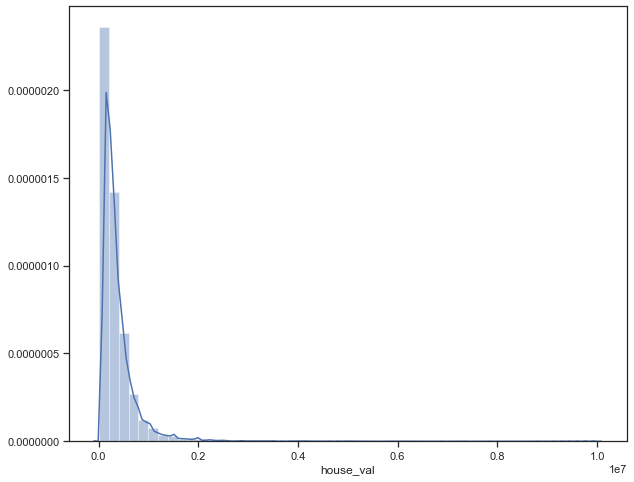

In [17]:
plt.figure(figsize=(10,8))
sns.distplot(data['house_val'])

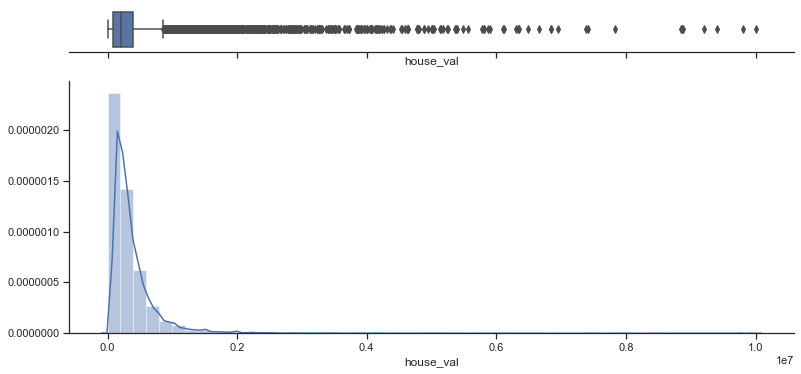

In [18]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.15, .85)},
                                   figsize=(13,6))

sns.boxplot(data['house_val'], ax=ax_box)
sns.distplot(data['house_val'], ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

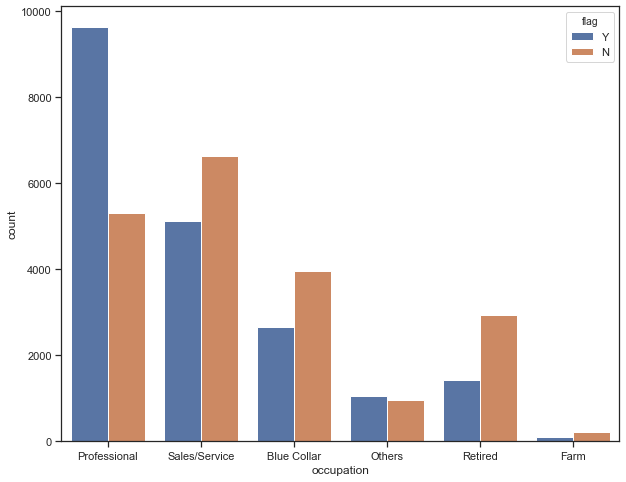

In [19]:
plt.figure(figsize=(10,8))
sns.countplot(x='occupation',hue='flag',data=data)

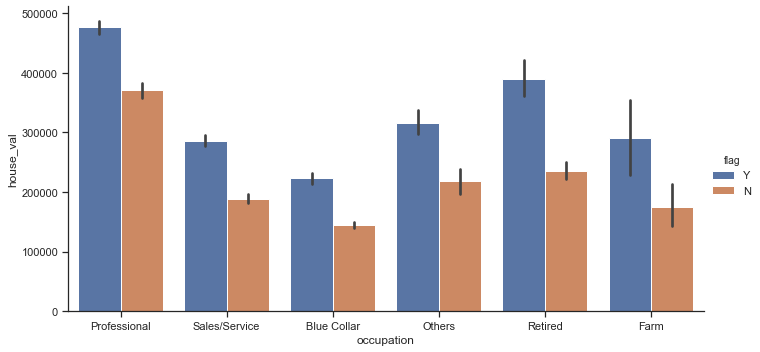

In [20]:
sns.catplot(x='occupation',hue='flag',y='house_val',kind="bar",data=data,aspect=2)

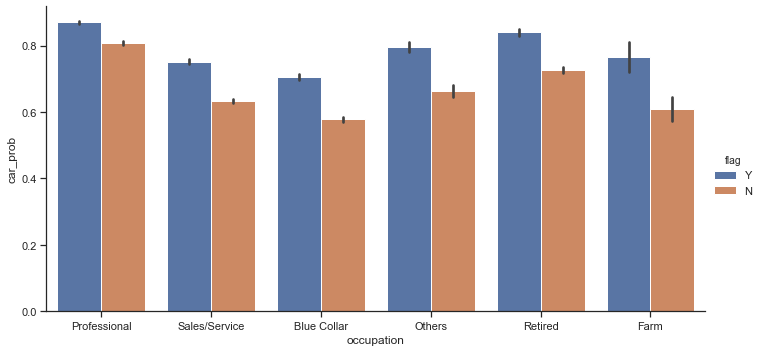

In [21]:
sns.catplot(x='occupation',hue='flag',y='car_prob',kind="bar",data=data,aspect=2)

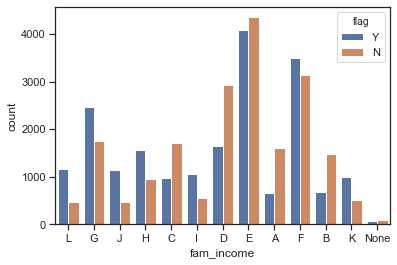

In [22]:
sns.countplot(x='fam_income',hue='flag',data=data)

Y       18012
N       13333
None     8655
Name: child, dtype: int64


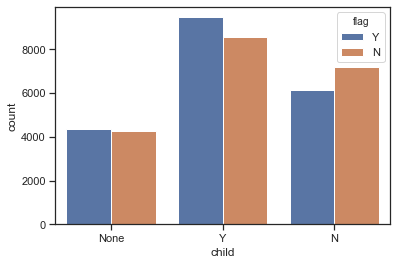

In [23]:
print(data['child'].value_counts())
sns.countplot(x='child',hue='flag',data=data)

In [24]:
data.head()

,flag,gender,education,house_val,age,online,customer_psy,marriage,child,occupation,mortgage,house_owner,region,car_prob,fam_income
0,Y,M,masters,756460,Unknown,N,B,Unmarried,None,Professional,low,Homeless,Midwest,1.0,L
1,N,F,bachelors,213171,>65,N,E,Unmarried,None,Professional,low,Owner,Northeast,0.8,G
2,N,M,associates,111147,0-25,Y,C,Unmarried,Y,Professional,low,Owner,Midwest,1.0,J
3,Y,M,associates,354151,0-25,Y,B,Single,None,Sales/Service,low,Homeless,West,0.9,L
4,Y,F,associates,117087,Unknown,Y,J,Married,Y,Sales/Service,low,Homeless,South,0.4,H


In [25]:
X = data.drop(columns='flag')
y = data['flag']

le = preprocessing.LabelEncoder()
y= le.fit_transform(y)
X = pd.get_dummies(X,drop_first=True)

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=.3,
                                                    random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(28000, 55)
(28000,)
(12000, 55)
(12000,)


In [27]:
# random forests
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state = 42)
model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [28]:
model_pred = model.predict(X_test)
model_probs = model.predict_proba(X_test)[:, 1]

print('Parameters currently in use:\n')
pprint(model.get_params())

Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [29]:
precision_score=precision_score(y_test,model_pred)
recall_score=recall_score(y_test,model_pred)
f1_score=f1_score(y_test,model_pred)
accuracy_model=accuracy_score(y_test,model_pred)
model_auc_value = roc_auc_score(y_test, model_probs)
print('model_AUC: %.3f' % model_auc_value)
print('model_accuracy: %.3f' % accuracy_model)
print('model_precision_score: %.3f' % precision_score)
print('model_recall_score: %.3f' % recall_score)
print('model_f1_score: %.3f' % f1_score)

model_AUC: 0.707
model_accuracy: 0.653
model_precision_score: 0.676
model_recall_score: 0.597
model_f1_score: 0.634


In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test, model_pred))

              precision    recall  f1-score   support

           0       0.63      0.71      0.67      5951
           1       0.68      0.60      0.63      6049

    accuracy                           0.65     12000
   macro avg       0.66      0.65      0.65     12000
weighted avg       0.66      0.65      0.65     12000



In [31]:
from sklearn.metrics import zero_one_loss
model_loss=zero_one_loss(y_test,model_pred)
print('model_loss: %.3f' % model_loss)

model_loss: 0.347


In [32]:
from sklearn.metrics import confusion_matrix
cm_model=confusion_matrix(y_test,model_pred)
print(cm_model)

[[4223 1728]
 [2439 3610]]


In [33]:
import pandas as pd
features = list(X_train.columns)
# Extract feature importances
fi = pd.DataFrame({'feature': list(X_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)
fi.head()

,feature,importance
0,house_val,0.162260
1,car_prob,0.088897
2,gender_M,0.037952
15,online_Y,0.029941
41,region_South,0.027726


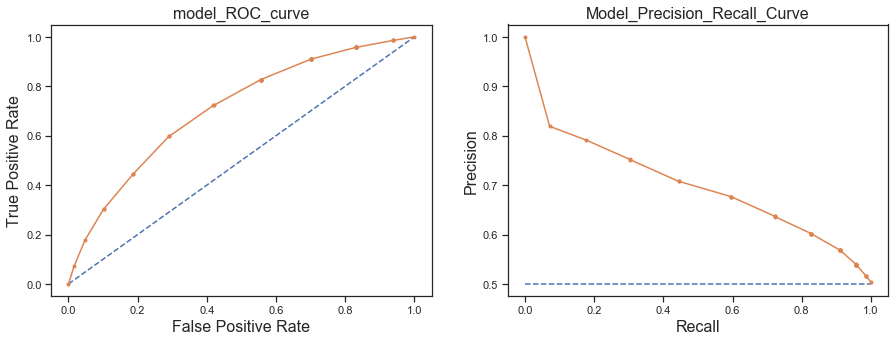

In [34]:
fig, axs = plt.subplots(1,2,figsize=(15,5))
#ROC_Curve
fpr, tpr, thresholds = roc_curve(y_test,model_probs)
axs[0].plot([0, 1], [0, 1], linestyle='--')
axs[0].plot(fpr, tpr, marker='.')
axs[0].set_xlabel('False Positive Rate', fontsize=16)
axs[0].set_ylabel('True Positive Rate', fontsize=16)
axs[0].set_title('model_ROC_curve', fontsize=16)
#Precision_Recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, model_probs)
axs[1].plot([0, 1], [0.5, 0.5], linestyle='--')
axs[1].plot(recall, precision, marker='.')
axs[1].set_xlabel('Recall', fontsize=16)
axs[1].set_ylabel('Precision', fontsize=16)
axs[1].set_title('Model_Precision_Recall_Curve', fontsize=16)
plt.show()

In [35]:
#SETTING PARAMETERS:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 500, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [1, 56, 111, 167, 222, 278, 333, 389, 444, 500]}


In [36]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  9.1min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [37]:
rf_random.best_params_

{'n_estimators': 167,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': True}

In [38]:
rf_pred = rf_random.predict(X_test)
rf_probs = rf_random.predict_proba(X_test)[:, 1]

In [39]:
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,accuracy_score
precision_score_rf=precision_score(y_test,rf_pred)
recall_score_rf=recall_score(y_test,rf_pred)
f1_score_rf=f1_score(y_test,rf_pred)
accuracy_rf=accuracy_score(y_test,rf_pred)
rf_auc_value = roc_auc_score(y_test, rf_probs)
print('AUC_rf: %.3f' % rf_auc_value)
print('accuracy_rf: %.3f' % accuracy_rf)
print('precision_score_rf: %.3f' % precision_score_rf)
print('recall_score:_rf %.3f' % recall_score_rf)
print('f1_score_rf: %.3f' % f1_score_rf)

AUC_rf: 0.758
accuracy_rf: 0.688
precision_score_rf: 0.688
recall_score:_rf 0.698
f1_score_rf: 0.693


In [40]:
rf_loss=zero_one_loss(y_test,rf_pred)
print('rf_loss: %.3f' % rf_loss)

rf_loss: 0.312


In [41]:
cm_rf=confusion_matrix(y_test,rf_pred)
print(cm_rf)

[[4039 1912]
 [1827 4222]]


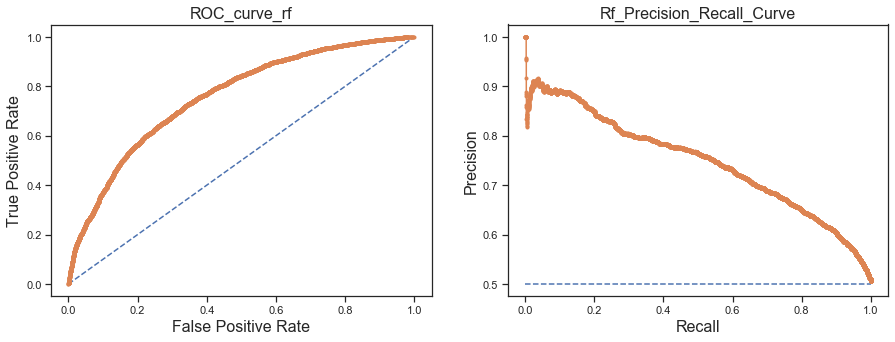

In [42]:
fig, axs = plt.subplots(1,2,figsize=(15,5))
#ROC_Curve_rf
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test,rf_probs)
axs[0].plot([0, 1], [0, 1], linestyle='--')
axs[0].plot(fpr_rf, tpr_rf, marker='.')
axs[0].set_xlabel('False Positive Rate', fontsize=16)
axs[0].set_ylabel('True Positive Rate', fontsize=16)
axs[0].set_title('ROC_curve_rf', fontsize=16)
#PRECISION_RECALL_CURVE_RF
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, rf_probs)
axs[1].plot([0, 1], [0.5, 0.5], linestyle='--')
axs[1].plot(recall_rf, precision_rf, marker='.')
axs[1].set_xlabel('Recall', fontsize=16)
axs[1].set_ylabel('Precision', fontsize=16)
axs[1].set_title('Rf_Precision_Recall_Curve', fontsize=16)
plt.show()